# Gemini AI y Llama Index en acción: una demo práctica paso a paso

Este notebook ofrece una demo detallada y práctica para entender y utilizar Gemini AI en conjunto con Llama Index. Aquí encontrarás una demostración paso a paso que ilustra cómo Gemini AI, un modelo de IA avanzado y versátil de Google, se integra con Llama Index para la creación de aplicaciones intuitivas y multimodales.

**CONTENIDO**
- Introducción: Una visión general de Gemini AI y su naturaleza multimodal, capaz de procesar y combinar información de diferentes fuentes.
- Background: Información sobre el desarrollo de Gemini por Google DeepMind y sus versiones: Ultra, Pro y Nano.
- Hands-On: Ejemplos prácticos de cómo implementar Gemini con Llama Index, incluyendo generación de contenido, procesamiento de imágenes y mantenimiento de conversaciones.
- Conclusiones: Reflexiones sobre las posibilidades y el futuro de la inteligencia artificial con Gemini.

**CÓMO EMPEZAR**
- Configuración Inicial: Sigue las instrucciones proporcionadas para configurar tu proyecto y acceder a Vertex AI a través de Google Cloud.
- Experimentación con Gemini: Utiliza los ejemplos de código para explorar las capacidades de generación de contenido y manejo de conversaciones de Gemini.
- Procesamiento de Imágenes: Aprende a cargar y procesar imágenes utilizando Gemini y Llama Index.

**CONTRIBUIR**

Si tienes ideas, preguntas o deseas discutir sobre las posibilidades de la IA y cómo trabajar juntos para construir soluciones basadas en IAG, no dudes en contactarme:

- GitHub: https://github.com/albertgilopez
- LinkedIn: Albert Gil López: https://www.linkedin.com/in/albertgilopez/
- Inteligencia Artificial Generativa (IAG) en español: https://www.codigollm.es/


In [2]:
import sys

# Autenticación adicional para Google Colab
if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

# @param {type:"string"}
PROJECT_ID = "tu-project-id"  # Sustituye con tu Project ID
# @param {type:"string"}
LOCATION = "us-central1"  # Elige tu región

if "google.colab" in sys.modules:
    import vertexai
    vertexai.init(project=PROJECT_ID, location=LOCATION)

# import os
# print(os.environ)

import vertexai

# https://stackoverflow.com/questions/50446716/google-api-core-exceptions-serviceunavailable-503-getting-metadata-from-plugin

from google.oauth2 import service_account
CREDENTIALS = service_account.Credentials.from_service_account_file("path-to-your-credentials-json")

vertexai.init(project=PROJECT_ID, credentials=CREDENTIALS)


In [8]:
from vertexai.preview.generative_models import (
    GenerationConfig,
    GenerativeModel,
    Image,
    Part,
)

Use the Gemini Pro model
The Gemini Pro (gemini-pro) model is designed to handle natural language tasks, multiturn text and code chat, and code generation.

**Text**

In [10]:
model = GenerativeModel("gemini-pro")

responses = model.generate_content("¿Por qué el cielo es azul?", stream=True)

for response in responses:
    print(response.text, end="")

El cielo es azul debido a un fenómeno físico llamado dispersión de Rayleigh. La luz del sol está compuesta por una mezcla de colores, cada uno con una longitud de onda diferente. Cuando la luz solar pasa por la atmósfera, las moléculas del aire dispersan la luz azul más que los otros colores. Esto se debe a que las moléculas del aire son más pequeñas que la longitud de onda de la luz azul. Como resultado, vemos más luz azul en el cielo que cualquier otro color.

La cantidad de luz que se dispersa por una molécula de aire depende del ángulo de la luz. Cuando el sol está alto en el cielo, la luz solar tiene que viajar a través de menos atmósfera para llegar a nuestros ojos. Esto significa que hay menos moléculas de aire para dispersar la luz, y el cielo aparece más azul. Cuando el sol está bajo en el cielo, la luz solar tiene que viajar a través de más atmósfera para llegar a nuestros ojos. Esto significa que hay más moléculas de aire para dispersar la luz, y el cielo aparece más rojo.

In [11]:
prompt = """Crea una lista de 10 elementos. Cada elemento tiene que ser una tendencia en la industria tecnologica.

Cada tenedencia tiene que ser inferior a 5 palabras"""  # try your own prompt

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

1. Automatización robótica de procesos
2. Computación en la nube
3. Inteligencia artificial
4. Realidad virtual y aumentada
5. Internet de las cosas
6. Blockchain
7. Ciberseguridad
8. Big data
9. 5G
10. Computación cuántica

### Model parameters

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. You can experiment with different model parameters to see how the results change.


In [14]:
generation_config = GenerationConfig(
    temperature=0.9,
    top_p=1.0,
    top_k=32,
    candidate_count=1,
    max_output_tokens=8192,
)

responses = model.generate_content(
    "¿Por qué el cielo es azul?",
    generation_config=generation_config,
    stream=True,
)

for response in responses:
    print(response.text, end="")

El cielo es azul debido a un fenómeno físico llamado dispersión de Rayleigh. La luz del sol está compuesta por una mezcla de colores, cada uno con una longitud de onda diferente. Cuando la luz solar pasa por la atmósfera, las moléculas del aire dispersan la luz azul más que los otros colores. Esto se debe a que las moléculas del aire son más pequeñas que la longitud de onda de la luz azul. Como resultado, vemos más luz azul en el cielo que cualquier otro color.

La cantidad de luz que se dispersa por una molécula de aire depende del ángulo de la luz. Cuando el sol está alto en el cielo, la luz solar tiene que viajar a través de menos atmósfera para llegar a nuestros ojos. Esto significa que hay menos moléculas de aire para dispersar la luz, y el cielo aparece más azul. Cuando el sol está bajo en el cielo, la luz solar tiene que viajar a través de más atmósfera para llegar a nuestros ojos. Esto significa que hay más moléculas de aire para dispersar la luz, y el cielo aparece más rojo.

**Chat**

The Gemini Pro model supports natural multi-turn conversations and is ideal for text tasks that require back-and-forth interactions. The following examples show how the model responds during a multi-turn conversation.

In [15]:
chat = model.start_chat()

prompt = """Mi nombre es Albert. Eres mi asistente personal. Mi película favorita es Titanic. Sugiereme una nueva película."""

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

* **The Shawshank Redemption (1994)**: Un banquero condenado injustamente por el asesinato de su esposa se hace amigo de un contrabandista en prisión.
* **The Godfather (1972)**: Una familia italoamericana de Nueva York está involucrada en el crimen organizado.
* **The Dark Knight (2008)**: Un vigilante enmascarado protege Gotham City de los criminales, incluido el Joker.
* **Inception (2010)**: Un ladrón profesional se introduce en los sueños de la gente para robar información valiosa.
* **Interstellar (2014)**: Un grupo de astronautas viaja a través de un agujero de gusano para encontrar un nuevo hogar para la humanidad.
* **La La Land (2016)**: Un pianista de jazz y una aspirante a actriz se enamoran en Los Ángeles.
* **Moonlight (2016)**: Un joven afroamericano crece en un barrio pobre de Miami.
* **Parasite (2019)**: Una familia pobre de Corea del Sur se infiltra en la casa de una familia rica.
* **The Green Mile (1999)**: Un guardia de prisión descubre que un preso condenado a mu

In [17]:
prompt = "¿Mi película favorita está basada en un libro?"

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Sí, tu película favorita, Titanic, está basada en el libro *Titanic: Una historia de fuego y hielo* de Walter Lord, publicado en 1955. El libro es un relato histórico del hundimiento del RMS Titanic, ocurrido en la madrugada del 15 de abril de 1912. Lord se basó en entrevistas con supervivientes, testimonios de la investigación oficial y otros documentos para reconstruir los acontecimientos de esa fatídica noche.

La película Titanic, dirigida por James Cameron y estrenada en 1997, es una adaptación del libro de Lord. La película sigue de cerca la trama del libro, aunque con algunas diferencias. Por ejemplo, la película se centra más en la historia de amor entre Jack y Rose, dos pasajeros de diferentes clases sociales que se conocen y se enamoran a bordo del Titanic.

Tanto el libro como la película han sido elogiados por su precisión histórica y su capacidad para capturar la tragedia del Titanic. El libro ganó el Premio Nacional del Libro de No Ficción en 1956, y la película ganó 11 P

In [18]:
print(chat.history)

[role: "user"
parts {
  text: "Mi nombre es Albert. Eres mi asistente personal. Mi película favorita es Titanic. Sugiereme una nueva película.\n"
}
, role: "model"
parts {
  text: "* **The Shawshank Redemption (1994)**: Un banquero condenado injustamente por el asesinato de su esposa se hace amigo de un contrabandista en prisión.\n* **The Godfather (1972)**: Una familia italoamericana de Nueva York está involucrada en el crimen organizado.\n* **The Dark Knight (2008)**: Un vigilante enmascarado protege Gotham City de los criminales, incluido el Joker.\n* **Inception (2010)**: Un ladrón profesional se introduce en los sueños de la gente para robar información valiosa.\n* **Interstellar (2014)**: Un grupo de astronautas viaja a través de un agujero de gusano para encontrar un nuevo hogar para la humanidad.\n* **La La Land (2016)**: Un pianista de jazz y una aspirante a actriz se enamoran en Los Ángeles.\n* **Moonlight (2016)**: Un joven afroamericano crece en un barrio pobre de Miami.\n*

In [67]:
# !pip install llama-index
# !pip install "google-generativeai>=0.3.0"
# !pip install Pillow
# !pip install matplotlib

# Utilizamos GenerativeModel a través de Vertex AI
# Otra opción es inizializarlo utilizando llama_index
# from llama_index.multi_modal_llms.gemini import GeminiMultiModal
# Si se usa esta opción hay que configurar una API KEY:

# import os
# GOOGLE_API_KEY = "tu-api-key"  # add your GOOGLE API key here
# os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)

image_urls = [
    "https://cdn.hobbyconsolas.com/sites/navi.axelspringer.es/public/media/image/2016/07/titanic.jpg?tf=1200x",
    # Añade más imágenes aquí
]

image_documents = load_image_urls(image_urls)

# from llama_index import SimpleDirectoryReader
# # load image documents from local directory
# image_documents = SimpleDirectoryReader("data/").load_data()


**Image**

https://cdn.hobbyconsolas.com/sites/navi.axelspringer.es/public/media/image/2016/07/titanic.jpg?tf=1200x


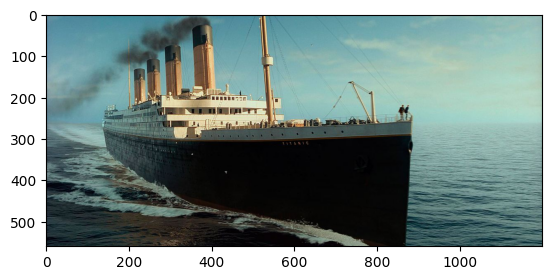

In [68]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [71]:
# Utilizando llama_index
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

gemini_pro = GeminiMultiModal(model="models/gemini-pro-vision")

complete_response = gemini_pro.complete(
    prompt="¿Puedes describirme esta escena?",
    image_documents=image_documents,
)

complete_response.text

CompletionResponse(text=' Es una imagen del Titanic, un trasatlántico británico que se hundió en el Océano Atlántico Norte la noche del 14 al 15 de abril de 1912, después de chocar con un iceberg durante su viaje inaugural desde Southampton a Nueva York.', additional_kwargs={}, raw={'content': {'parts': [{'text': ' Es una imagen del Titanic, un trasatlántico británico que se hundió en el Océano Atlántico Norte la noche del 14 al 15 de abril de 1912, después de chocar con un iceberg durante su viaje inaugural desde Southampton a Nueva York.'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': [], 'block_reason': 0}, delta=None)

In [95]:
complete_response.text

' Es una imagen del Titanic, un trasatlántico británico que se hundió en el Océano Atlántico Norte la noche del 14 al 15 de abril de 1912, después de chocar con un iceberg durante su viaje inaugural desde Southampton a Nueva York.'